# The intra-EU politics of brain drain - NetworkX analysis

### This is a work-in-progress - comments are welcomed

The purpose of this analysis is to explore a hand-coded set of Parliamentary Questions posed in the European Parliament concerning the topic of 'brain drain' as an intra-European Union phenomenon. The topic has become increasingly controversial in recent years with the growing politicization of the negative externalities of European labor mobility. 

The following table displays the number of questions asked during each of the last four parliamentary periods. 

|                            |     Stage  1    | Stage 1 (continued) |     Stage 2     |     Stage 3     |             |
|:--------------------------:|:---------------:|:-------------------:|:---------------:|:---------------:|:-----------:|
|    Parliamentary period    |    1999-2004    |      2004-2009      |    2009-2014    |    2014-2019    |    Total    |
|     Number of questions    |        5        |          26         |        43       |        32       |     105     |

Going through these questions in the [Discourse Network Analyzer](https://github.com/leifeld/dna) software, I identified a total of 675 statements uttered by 133 different persons (Members of the European Parliament and Commissioners). Each statement was coded according to an iteratively developed coding scheme that exhausted all the different ways that brain drain was presented as a problem, as well as the solutions offered to the problem. 

I start by importing the required packages for NetworkX (including bipartite algorithms, as this is a two-mode network) as well as Pandas for dataframe management.  

In [1]:
import networkx as nx
from networkx.algorithms import bipartite
import pandas as pd

Next I read the data using Pandas read_excel function and load it to check that it looks correct. Use double back-slashes because Python uses single backslashes to escape characters that otherwise have a special meaning. 

In [2]:
df = pd.read_excel("data/braindrain2.xlsx")

df

,ID,ARTICLE TITLE,DATE,STAGE,PERSON,ORGANIZATION,MEP,COUNTRY,CATEGORY,TEXT
0,2,E-0148/99,1999-02-11 00:00:00,1,Joaquin Sisó Cruellas (EPP),EPP,Y,Spain,Problem - Third country emigration,Participation in international education and t...
1,35,E-0148/99,1999-02-11 00:00:00,1,Joaquin Sisó Cruellas (EPP),EPP,Y,Spain,Problem - Working conditions,It would appear that the presence of centres o...
2,1,E-0148/99,1999-02-11 00:00:00,1,Joaquin Sisó Cruellas (EPP),EPP,Y,Spain,Solution - R&D,"Once abroad, European scientists often find it..."
3,36,E-0148/99,1999-02-11 00:00:00,1,Édith Cresson,DG Research,N,France,Solution - Increase mobility,The Commission is concerned with the trends sh...
4,3,E-0148/99,1999-02-11 00:00:00,1,Édith Cresson,DG Research,N,France,Solution - Refutation,The success of this scholarship scheme proves ...
5,4,E-0148/99,1999-02-11 00:00:00,1,Édith Cresson,DG Research,N,France,Solution - Member States,"In line with the subsidiarity principle, actio..."
6,5,E-0148/99,1999-02-11 00:00:00,1,Édith Cresson,DG Research,N,France,Solution - Private sector,"As is also indicated in the IPTS report, the E..."
7,37,E-0148/99,1999-02-11 00:00:00,1,Édith Cresson,DG Research,N,France,Solution - R&D,The Commission will continue its efforts to st...
8,7,E-0148/99,1999-02-11 00:00:00,1,Édith Cresson,DG Research,N,France,Solution - Circular migration,With regard to the brain drain within the Comm...
9,6,E-0148/99,1999-02-11 00:00:00,1,Édith Cresson,DG Research,N,France,Solution - Member States,The Commission also encourages the cohesion Me...


With NetworkX, I now create a graph object by using the function to read from a Pandas dataframe, identified as an edgelist that displays connections from persons to categories. Persons here are the Members of the European Parliament asking the questions or Commissioners answering the questions, and categories are a coding scheme of frames that identify brain drain as a specific type of problems and suggested solutions to the problem. I also read the dates associated with each occurence of a statement to timestamp all the edges. The "STAGE" attribute groups dates into stages 1, 2, or 3 as identified previously. I can also store the actual text of each statement within each edge.

The printed info tells us that the amount of edges corresponds to the number of statements I identified, and the amount of nodes corresponds to the number of individual persons identified. 

In [6]:
G = nx.from_pandas_edgelist(df,
                            source="PERSON",
                            target="CATEGORY",
                            edge_attr=["STAGE", "DATE"],
                            create_using=nx.MultiGraph(),
                            )

print(nx.info(G))

Name: 
Type: MultiGraph
Number of nodes: 134
Number of edges: 675
Average degree:  10.0746


The graph should be a two-mode network where all organizations connect only to categories. We can check for this with the nx.is_bipartite() function.

In [7]:
print("Is the graph bipartite?")
nx.is_bipartite(G)

Is the graph bipartite?


True

We can also check to see whether the edges are correctly timestamped by listing the edges and reading their associated data. (Slicing to just check the first 5 entries.)

In [9]:
list(G.edges(data=True))[:5]

[('Joaquin Sisó Cruellas (EPP)',
  'Problem - Third country emigration',
  {'DATE': Timestamp('1999-02-11 00:00:00'), 'STAGE': 1}),
 ('Joaquin Sisó Cruellas (EPP)',
  'Problem - Working conditions',
  {'DATE': Timestamp('1999-02-11 00:00:00'), 'STAGE': 1}),
 ('Joaquin Sisó Cruellas (EPP)',
  'Solution - R&D',
  {'DATE': Timestamp('1999-02-11 00:00:00'), 'STAGE': 1}),
 ('Problem - Third country emigration',
  'Brice Hortefeux (EPP)',
  {'DATE': Timestamp('2003-04-02 00:00:00'), 'STAGE': 1}),
 ('Problem - Third country emigration',
  'Manolis Mavrommatis (EPP)',
  {'DATE': Timestamp('2005-11-29 00:00:00'), 'STAGE': 1})]

I should find out which nodes are categories and which are persons. I can use NetworkX's bipartite algorithms for this. 

In [11]:
bottom_nodes, top_nodes = bipartite.sets(G)
persons = set(bottom_nodes)
frames = set(top_nodes)
print(persons)

{'Johannes Hahn', 'László Andor', 'Erik Meijer (GUE/NGL)', 'Frank Vanhecke (ITS)', 'Dimitrios Papadimoulis (GUE/NGL)', 'Norica Nicolai (ALDE)', 'Vytenis Andriukaitis', 'João Ferreira (GUE/NGL)', 'Dimitris Avramopoulos', 'António Vitorino', 'Gaston Franco', 'Kostas Chrysogonos (GUE/NGL)', 'Cristiana Muscardini (UEN)', 'Marian Harkin (ALDE)', 'Lefteris Christoforou (EPP)', 'Joaquin Sisó Cruellas (EPP)', 'Marina Albiol Guzmán (GUE/NGL)', 'Ioannis A. Tsoukalas (EPP)', 'Margot Parker (EFDD)', 'István Ujhelyi (S&D)', 'Matteo Salvini (EFD)', 'Viviane Reding', 'European Commission', 'Adam Bielan (ECR)', 'Andris Piebalgs', 'Olli Rehn', 'Ashley Mote (NI)', 'Robert Evans (PSE)', 'Carlos Moedas', 'Louis Michel', 'Joëlle Mélin (ENF)', 'Tibor Navracsics', 'Paloma López Bermejo (GUE/NGL)', 'Monika Panayotova (EPP)', 'Androulla Vassiliou', 'Vasilica Viorica Dancila (S&D)', 'Andrew Henry William Brons (NI)', 'Daciana Octavia Sarbu (S&D)', 'Máire Geoghegan-Quinn', 'Catalin Sorin Ivan (S&D)', 'Niki Tzave

Next, I create a dictionary "c" associating each node with the value 0 or 1 depending on their membership in top_nodes or bottom_nodes. 

In [12]:
c = bipartite.color(G)
print(c)

{'Joaquin Sisó Cruellas (EPP)': 1, 'Problem - Third country emigration': 0, 'Problem - Working conditions': 0, 'Solution - R&D': 0, 'Édith Cresson': 1, 'Philippe Busquin': 1, 'European Council': 1, 'Manolis Mavrommatis (EPP)': 1, 'Janez Potocnik': 1, 'Ján Figel': 1, 'Frank Vanhecke (ITS)': 1, 'Máire Geoghegan-Quinn': 1, 'Matteo Salvini (EFD)': 1, 'Johannes Hahn': 1, 'Francisco Sosa Wagner (NI)': 1, 'Carlos Moedas': 1, 'Marianne Thyssen': 1, 'Lefteris Christoforou (EPP)': 1, 'Tibor Navracsics': 1, 'Catalin Sorin Ivan (S&D)': 1, 'Problem - R&D': 0, 'Brice Hortefeux (EPP)': 1, 'Robert Evans (PSE)': 1, 'Teresa Riera Madurell (S&D)': 1, 'Emmanouil Angelakas (EPP)': 1, 'Nirj Deva (EPP)': 1, 'Louis Michel': 1, 'Ioannis A. Tsoukalas (EPP)': 1, 'Ioannis A. Tsoukalas (EPP) & Georgios Papanikolaou (EPP)': 1, 'Niki Tzavela (EFD)': 1, 'Maria Irigoyen Pérez (S&D)': 1, 'Willy Meyer (GUE/NGL)': 1, 'Josu Juaristi Abaunz (GUE/NGL)': 1, 'Ivan Jakovcic (ALDE)': 1, 'Daniel Buda (EPP)': 1, 'Notis Marias (EC

Computing centrality measures here. 

In [13]:
degree_centrality = bipartite.degree_centrality(G, persons)
betweenness_centrality = bipartite.betweenness_centrality(G, persons)
closeness_centrality = bipartite.closeness_centrality(G, persons, normalized=True)

Next, I want to store some attributes for each node. Node attributes can be read from dictionaries using the nx.set_node_attributes function. First, I have to create some dictionaries. I use the zip function to create dictionaries where persons are keys and organizations, countries, and MEP status enters as values. 

In [14]:
org_dict = dict(zip(df.PERSON, df.ORGANIZATION))
country_dict = dict(zip(df.PERSON, df.COUNTRY))
mep_dict = dict(zip(df.PERSON, df.MEP))

I can check to see if the dictionary was correctly created by calling a person from the dataset. 

In [15]:
print(org_dict['Viviane Reding'])
print(country_dict['Viviane Reding'])
print(mep_dict['Viviane Reding'])

DG EAC
Luxembourg
N


Now I set node attributes using those dictionaries, the bipartite color dictionary, and also adding in the centrality measures computed earlier. 

In [16]:
nx.set_node_attributes(G, org_dict, 'ORGANIZATION')
nx.set_node_attributes(G, country_dict, 'COUNTRY')
nx.set_node_attributes(G, mep_dict, 'MEP')
nx.set_node_attributes(G, c, 'bipartite')
nx.set_node_attributes(G, degree_centrality, 'degree_centrality')
nx.set_node_attributes(G, betweenness_centrality, 'betweenness_centrality')
nx.set_node_attributes(G, closeness_centrality, 'closeness_centrality')

Checking to see if it worked with the list function, we can confirm that all person nodes are now associated with countries, MEP status, and an organization - as well as the centrality measures. (Slicing here to check the last 10 entries.)

In [42]:
list(G.nodes(data=True))[-10:]

[('Neoklis Sylikiotis (GUE/NGL)',
  {'COUNTRY': 'Cyprus',
   'MEP': 'Y',
   'ORGANIZATION': 'GUE/NGL',
   'betweenness_centrality': 0.0007484179280683063,
   'bipartite': 1,
   'closeness_centrality': 0.5299334811529933,
   'degree_centrality': 0.14814814814814814}),
 ('Dominique Martin (ENF) & Joëlle Mélin (ENF)',
  {'COUNTRY': 'France',
   'MEP': 'Y',
   'ORGANIZATION': 'ENF',
   'betweenness_centrality': 0.0,
   'bipartite': 1,
   'closeness_centrality': 0.45873320537428025,
   'degree_centrality': 0.037037037037037035}),
 ('Catalin Sorin Ivan (S&D)',
  {'COUNTRY': 'Romania',
   'MEP': 'Y',
   'ORGANIZATION': 'S&D',
   'betweenness_centrality': 0.001967422257854745,
   'bipartite': 1,
   'closeness_centrality': 0.5786924939467313,
   'degree_centrality': 0.1111111111111111}),
 ('Joëlle Mélin (ENF)',
  {'COUNTRY': 'France',
   'MEP': 'Y',
   'ORGANIZATION': 'ENF',
   'betweenness_centrality': 0.0005178717804083607,
   'bipartite': 1,
   'closeness_centrality': 0.5623529411764706,
   

### Plotting with nxviz package

In [18]:
import matplotlib.pyplot as plt
%matplotlib notebook
import nxviz as nv
from nxviz import CircosPlot

<IPython.core.display.Javascript object>


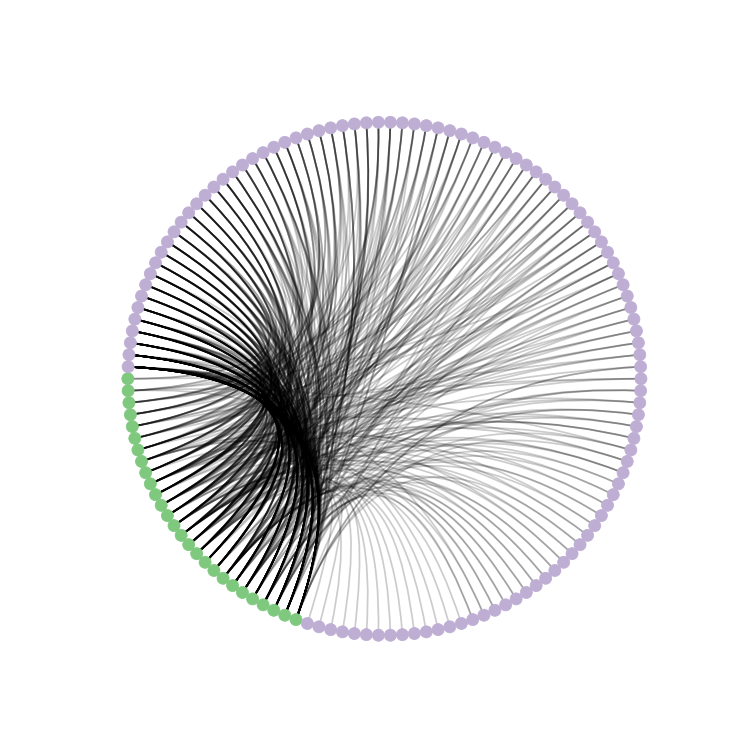

In [44]:
c = CircosPlot(G, node_order='degree_centrality', node_grouping='bipartite', node_color='bipartite')
c.draw()

This visualization shows all nodes and edges in the graph, ordered according to degree centrality and colored and grouped according to whether they are persons or frames. For this visualization to be really useful, I would need labels for key nodes and colors according to organizational affiliation. I also need to create three images (one for each 'STAGE' attribute of the edges) in order to show how the debate changed over time.